In [1]:
import seaborn as sns
import warnings 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="dark")
warnings.filterwarnings('ignore')

In [3]:
tips = sns.load_dataset("tips").dropna()
#tips.shape
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
#tips.nunique()
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='day', ylabel='total_bill'>

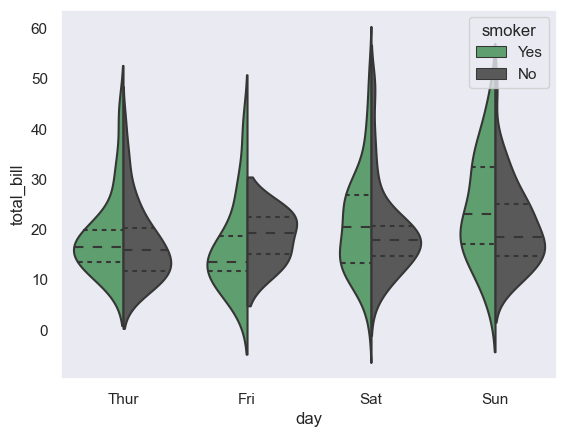

In [5]:
sns.violinplot(
    data=tips, 
    x="day", 
    y="total_bill", 
    hue="smoker",
    split=True, 
    inner="quart", 
    fill=False,
    palette={"Yes": "g", "No": ".35"}
)

<Axes: xlabel='day', ylabel='tip'>

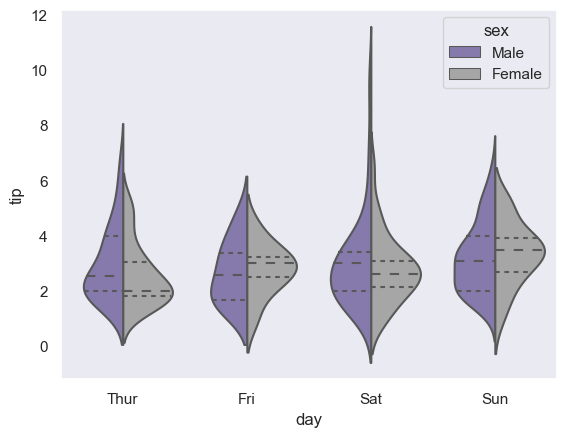

In [6]:
sns.violinplot(
    data=tips, 
    x="day", 
    y="tip", 
    hue="sex",
    split=True, 
    inner="quart", 
    fill=False,
    palette={"Male": "m", "Female": ".65"}
)

In [7]:
seaice = sns.load_dataset("seaice")
seaice.head()

Date  Extent
0 1980-01-01  14.200
1 1980-01-03  14.302
2 1980-01-05  14.414
3 1980-01-07  14.518
4 1980-01-09  14.594

In [8]:
seaice.shape

(13175, 2)

In [9]:
seaice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13175 non-null  datetime64[ns]
 1   Extent  13175 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 206.0 KB


In [10]:
seaice.nunique()

Date      13175
Extent     7649
dtype: int64

In [11]:
seaice["Decade"] = np.floor(seaice["Date"].dt.year.divide(10)).multiply(10).astype(int)
seaice["Decade"].unique()

array([1980, 1990, 2000, 2010])

<Axes: xlabel='Extent', ylabel='Decade'>

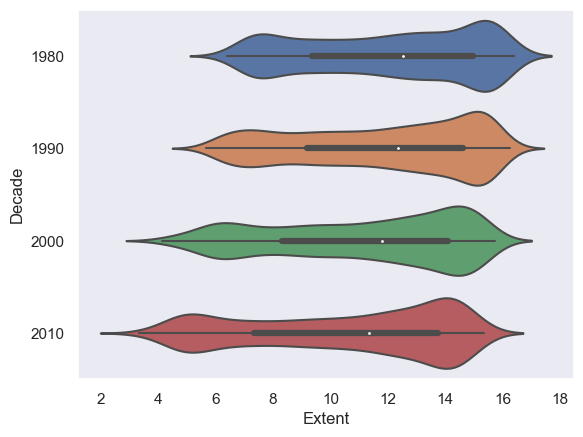

In [12]:
sns.violinplot(seaice, x="Extent", y="Decade", orient="h", fill=False)

In [13]:
sns.set_theme(style="whitegrid")

In [24]:
bn=sns.load_dataset('brain_networks',header=[0,1,2], index_col=0)
bn.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

In [25]:
used_networks=[1,2,4,5,6,7,8,11,13,16,17]
used_columns=(bn.columns.get_level_values('network').astype(int).isin(used_networks))
used_columns

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [26]:
bn=bn.loc[:,used_columns]
bn.head()

network          1                     2                     4             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  47.461037  26.746613   
1        55.547253  43.690075 -65.495987 -13.974523  -1.210660 -19.012897   
2        60.997768  63.438793 -51.108582 -13.561346 -65.575806 -85.777428   
3        18.514868  12.657158 -34.576603 -32.665958 -41.800869 -58.610184   
4        -2.527392 -63.104668 -13.814151 -15.837989 -62.613335 -49.076508   

network          5                     6             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0       -35.898861  -1.889181   5.898688 -43.692322  ...   0.607904   
1        19.568010  15.902983 -23.231823 -10.745867  ...  57.495071   
2        19.247454  37.209419   2.392153  16.509109  ...  28.317369   
3        32.896915  11.199619 -14.665752   2.073715  ...  71.439629   
4        18.396759   3.219077 -41.856911 -24.690414  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 47 columns]

In [27]:
corr_bn = bn.corr().groupby(level="network").mean()
corr_bn.index = corr_bn.index.astype(int)
corr_bn = corr_bn.sort_index().T
corr_bn

network                  1         2         4         5         6         7   \
network node hemi                                                               
1       1    lh    0.940758 -0.058568 -0.367388  0.425164 -0.057770 -0.275816   
             rh    0.940758  0.023403 -0.335360  0.475935 -0.012364 -0.229890   
2       1    lh   -0.014813  0.906697 -0.006337 -0.125769 -0.079588  0.051542   
             rh   -0.020352  0.906697 -0.016105 -0.134109 -0.097788  0.047255   
4       1    lh   -0.353147 -0.018675  0.907364 -0.234307  0.131866  0.366093   
             rh   -0.349601 -0.003767  0.907364 -0.253040  0.087337  0.302202   
5       1    lh    0.431786 -0.160438 -0.230126  0.911449  0.275379 -0.103652   
             rh    0.469312 -0.099440 -0.257221  0.911449  0.267579 -0.108846   
6       1    lh   -0.060177 -0.045004  0.157311  0.255603  0.573441  0.283326   
             rh    0.002677 -0.090697  0.088655  0.401885  0.626314  0.320228   
        2    lh   -0.063111 -0.148755  0.098668  0.167566  0.525855  0.280571   
             rh   -0.019657 -0.070296  0.093774  0.260862  0.558416  0.255603   
7       1    lh   -0.308897  0.034129  0.446087 -0.231505  0.190905  0.619272   
             rh   -0.267666  0.114216  0.367882 -0.080596  0.322854  0.638759   
        2    lh   -0.363550  0.133781  0.386652 -0.193413  0.232189  0.589295   
             rh   -0.299915  0.075846  0.373569 -0.183673  0.238991  0.631601   
        3    lh   -0.169581 -0.031981  0.209373 -0.023062  0.335749  0.630577   
             rh   -0.107509 -0.029601  0.221321  0.074753  0.388904  0.609847   
8       1    lh   -0.362722  0.158361  0.017239 -0.372297 -0.036357  0.242871   
             rh   -0.395465  0.110076 -0.001599 -0.328916 -0.023428  0.278742   
        2    lh   -0.327407  0.017536  0.225405 -0.262639  0.013079  0.351678   
             rh   -0.351986  0.021899  0.180573 -0.253869  0.018649  0.345331   
        3    lh   -0.328728  0.112435  0.191949 -0.386714 -0.091193  0.223598   
             rh   -0.346915  0.089939  0.104059 -0.319216 -0.012644  0.259593   
11      1    lh   -0.390837  0.084486 -0.113477 -0.326487 -0.151778 -0.016966   
             rh   -0.325613  0.085792 -0.182579 -0.254397 -0.185779 -0.024879   
13      1    lh   -0.292910 -0.137389 -0.029003 -0.416276 -0.223246 -0.143748   
             rh   -0.302794 -0.161671 -0.110968 -0.353713 -0.249628 -0.152438   
        2    lh   -0.372171 -0.108703 -0.014240 -0.384041 -0.171167 -0.075785   
             rh   -0.366963 -0.201949 -0.082330 -0.307075 -0.175352 -0.133249   
        3    rh   -0.361620 -0.129655 -0.141589 -0.309276 -0.216471 -0.120135   
        4    rh   -0.127895 -0.136093 -0.149943 -0.061396 -0.215815 -0.239260   
16      1    lh   -0.277935 -0.018437  0.053009 -0.522852 -0.281449 -0.109069   
             rh   -0.254489 -0.036752  0.027710 -0.442857 -0.236872 -0.048568   
        2    lh   -0.207364 -0.077446 -0.117661 -0.382675 -0.303127 -0.312413   
             rh   -0.195588 -0.046877 -0.168529 -0.357103 -0.318181 -0.275175   
        3    lh   -0.319227 -0.063973  0.072408 -0.437266 -0.196470 -0.127336   
             rh   -0.140086 -0.199943 -0.198590 -0.147307 -0.212007 -0.324507   
        4    lh   -0.193345 -0.242416 -0.110339 -0.260617 -0.241499 -0.354396   
             rh   -0.255228 -0.077415 -0.041459 -0.305370 -0.250977 -0.191898   
17      1    lh   -0.156373 -0.247778 -0.117414 -0.187305 -0.207832 -0.268622   
             rh   -0.212282 -0.180061 -0.203751 -0.240847 -0.211418 -0.215853   
        2    lh   -0.239874 -0.188086  0.052451 -0.377200 -0.171943 -0.152360   
             rh   -0.239529 -0.148606  0.018593 -0.297151 -0.161522 -0.114746   
        3    lh   -0.158496 -0.215183  0.085089 -0.274267 -0.143464 -0.046571   
             rh   -0.213949 -0.067752  0.115054 -0.290016 -0.094495 -0.006968   
        4    lh   -0.246454 -0.213115 -0.050376 -0.281074 -0.141300 -0.225103   

network                  8    

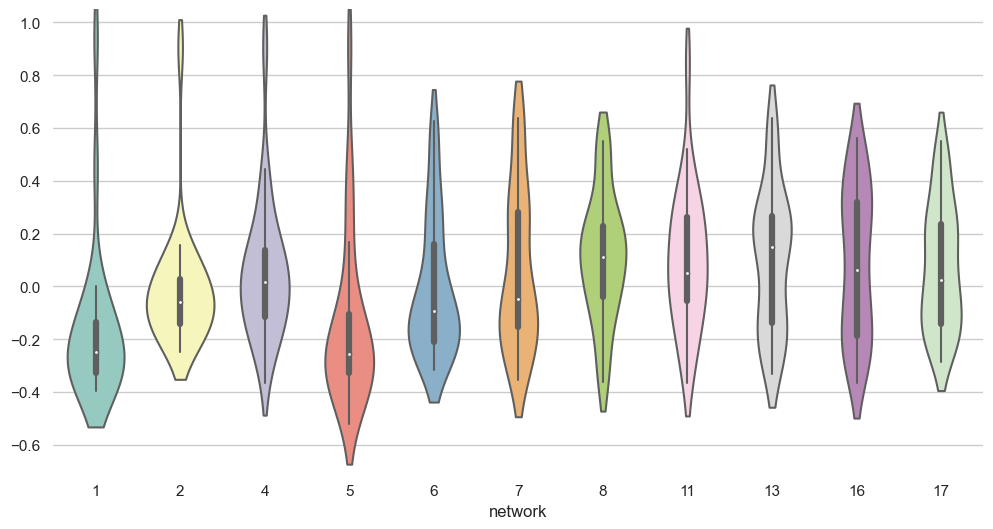

In [29]:
f, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=corr_bn, bw_adjust=.5, cut=1, lw=1, palette="Set3")
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)